# MATH2970 Computer Assignment

**Author:** 510575452

In [3]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.optimize import minimize

## Exploring Raw Data

In [4]:
stocks = pd.read_csv('data/project_data.csv', parse_dates=['Date'])
stocks.head()

,Date,BHP,CBA,CSL,NAB,WBC,ANZ,MQG,WES,GMG,FMG
0,2022-07-01,33.62,81.91,260.65,24.64,17.21,19.16,151.74,38.63,17.75,13.25
1,2022-07-04,33.49,82.59,266.04,24.85,17.43,19.40,154.43,39.60,18.25,13.31
2,2022-07-05,33.57,82.39,270.05,24.77,17.43,19.33,155.85,39.82,18.08,13.50
3,2022-07-06,31.69,83.09,277.01,25.22,17.59,19.51,156.75,40.47,18.77,12.85
4,2022-07-07,32.68,84.06,277.85,25.22,17.72,19.86,157.67,41.04,18.69,13.41


## Question 1

In [5]:
BHP_return = (stocks['BHP']/stocks['BHP'].shift(1) - 1)
BHP_return = BHP_return[1:]
BHP_return_mean = np.mean(BHP_return)

CBA_return = (stocks['CBA']/stocks['CBA'].shift(1) - 1)
CBA_return = CBA_return[1:]
CBA_return_mean = np.mean(CBA_return)

CSL_return = (stocks['CSL']/stocks['CSL'].shift(1) - 1)
CSL_return = CSL_return[1:]
CSL_return_mean = np.mean(CSL_return)

NAB_return = (stocks['NAB']/stocks['NAB'].shift(1) - 1)
NAB_return = NAB_return[1:]
NAB_return_mean = np.mean(NAB_return)

WBC_return = (stocks['WBC']/stocks['WBC'].shift(1) - 1)
WBC_return = WBC_return[1:]
WBC_return_mean = np.mean(WBC_return)

ANZ_return = (stocks['ANZ']/stocks['ANZ'].shift(1) - 1)
ANZ_return = ANZ_return[1:]
ANZ_return_mean = np.mean(ANZ_return)

MQG_return = (stocks['MQG']/stocks['MQG'].shift(1) - 1)
MQG_return = MQG_return[1:]
MQG_return_mean = np.mean(MQG_return)

WES_return = (stocks['WES']/stocks['WES'].shift(1) - 1)
WES_return = WES_return[1:]
WES_return_mean = np.mean(WES_return)

GMG_return = (stocks['GMG']/stocks['GMG'].shift(1) - 1)
GMG_return = GMG_return[1:]
GMG_return_mean = np.mean(GMG_return)

FMG_return = (stocks['FMG']/stocks['FMG'].shift(1) - 1)
FMG_return = FMG_return[1:]
FMG_return_mean = np.mean(FMG_return)


# Calculate the expected returns
r = pd.DataFrame([BHP_return, CBA_return, CSL_return, NAB_return, WBC_return, ANZ_return, MQG_return, WES_return, GMG_return, FMG_return]).T
r = r.mean()
r = r.to_numpy().round(6)
print(f"r = {r}")

# Calculate the covariance matrix
C = np.cov([BHP_return, CBA_return, CSL_return, NAB_return, WBC_return, ANZ_return, MQG_return, WES_return, GMG_return, FMG_return]).round(6)

print(f'C = {C}')


r = [0.000529 0.000894 0.000294 0.000826 0.000974 0.000828 0.000686 0.001077
 0.001472 0.001064]
C = [[2.24e-04 3.80e-05 4.00e-06 3.50e-05 3.60e-05 3.40e-05 7.40e-05 4.60e-05
  5.20e-05 2.30e-04]
 [3.80e-05 1.06e-04 4.10e-05 9.10e-05 9.00e-05 8.00e-05 7.70e-05 6.30e-05
  7.50e-05 4.00e-05]
 [4.00e-06 4.10e-05 1.23e-04 3.10e-05 2.90e-05 2.90e-05 4.50e-05 5.10e-05
  6.40e-05 5.00e-06]
 [3.50e-05 9.10e-05 3.10e-05 1.20e-04 9.90e-05 8.90e-05 8.10e-05 5.90e-05
  6.60e-05 4.00e-05]
 [3.60e-05 9.00e-05 2.90e-05 9.90e-05 1.26e-04 9.50e-05 7.90e-05 6.10e-05
  6.60e-05 4.40e-05]
 [3.40e-05 8.00e-05 2.90e-05 8.90e-05 9.50e-05 1.15e-04 7.80e-05 5.80e-05
  6.80e-05 4.30e-05]
 [7.40e-05 7.70e-05 4.50e-05 8.10e-05 7.90e-05 7.80e-05 1.85e-04 8.60e-05
  1.13e-04 9.60e-05]
 [4.60e-05 6.30e-05 5.10e-05 5.90e-05 6.10e-05 5.80e-05 8.60e-05 1.35e-04
  1.13e-04 4.80e-05]
 [5.20e-05 7.50e-05 6.40e-05 6.60e-05 6.60e-05 6.80e-05 1.13e-04 1.13e-04
  2.79e-04 7.50e-05]
 [2.30e-04 4.00e-05 5.00e-06 4.00e-05 4.40e-

## Question 2

Define constraints:

$a = \textbf{e}^TC^{-1}\textbf{e}$


$b = \textbf{r}^TC^{-1}\textbf{e}$


$c = \textbf{r}^TC^{-1}\textbf{r}$


$d = ac-b^2$


If $C$ is invertible, the solution to


\begin{equation*}
\begin{aligned}
    \min_{x \in \mathbb{R}^n} \quad & Z(x) = -tx^T r + \frac{1}{2} x^T C x \\
    \text{s.t.} \quad & x^T e = 1
\end{aligned}
\end{equation*}


which can be simplified to the following equation
\begin{equation*}
\begin{aligned}
    \textbf{x}(t) = \alpha + t\beta
\end{aligned}
\end{equation*}


In [6]:
e = np.ones(len(r))

C_inverse = np.linalg.inv(C)

a = e.T @ C_inverse @ e
b = r.T @ C_inverse @ e
c = r.T @ C_inverse @ r
d = (a*c) - (b**2)

alpha = (1/a) * (C_inverse @ e) 
beta = (C_inverse @ r) - ((b/a) * (C_inverse @ e))

print(f'x(t) = {alpha} + t{beta}')

x(t) = [ 0.20916302  0.05544382  0.3589362   0.10993805  0.05130531  0.20014944
 -0.05543784  0.1156983  -0.03130631 -0.01388999] + t[-4.04536855  2.80243309 -5.59801604 -1.81357726  3.40522874 -1.71209597
 -2.84146853  3.76686675  3.36565366  2.67034411]


# Question 3

## Part a

In [7]:
t = 0.06

investment = 100000

x = alpha + t*beta

print('Optimal Investment Allocation:')

for stock in range(len(x)):
    print(f'{stocks.columns[stock+1]} = ${x[stock]*investment:.2f}')

mu = (b + d*t)/a * investment
sigma = np.sqrt(1+d*t**2)/np.sqrt(a) * investment


print(f'Mean Portfolio Return: ${mu:.2f}')
print(f'Portfolio Standard Deviation: ${sigma:.2f}')

Optimal Investment Allocation:
BHP = $-3355.91
CBA = $22358.98
CSL = $2305.52
NAB = $112.34
WBC = $25561.90
ANZ = $9742.37
MQG = $-22592.59
WES = $34171.03
GMG = $17063.29
FMG = $14633.07
Mean Portfolio Return: $113.94
Portfolio Standard Deviation: $958.01


# Question 4

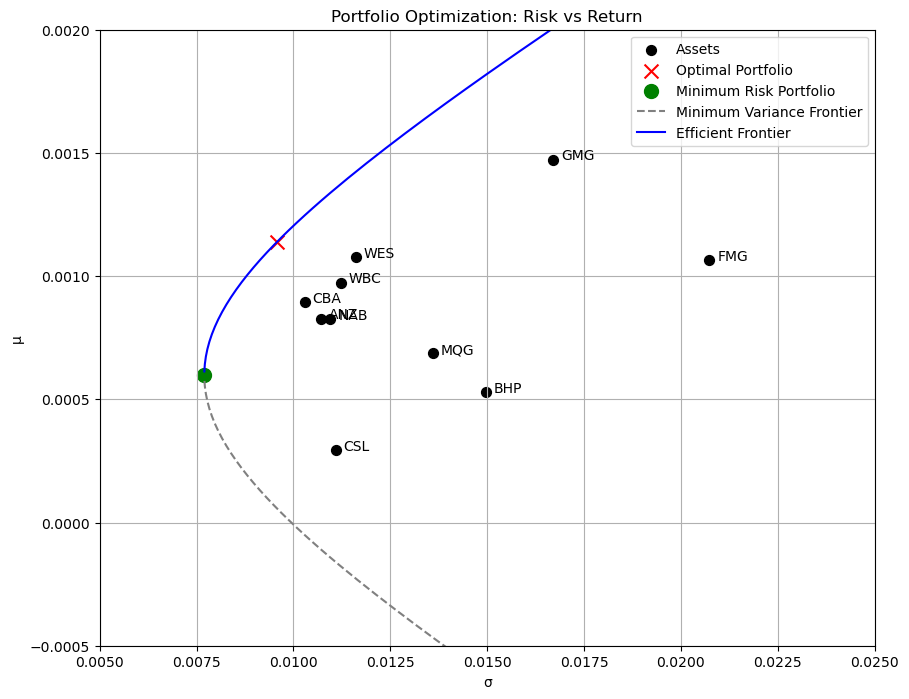

In [8]:
asset_risks = np.sqrt(np.diag(C))

plt.figure(figsize=(10, 8))

# Plot the 10 assets (Part i)
plt.scatter(asset_risks, r, label='Assets', color='black', s=50)
for i in range(len(r)):
    plt.text(asset_risks[i]+0.0002, r[i], stocks.columns[i+1])


# Plot the optimal portfolio (Part ii)
optimal_risk = np.sqrt(x.T @ C @ x)
optimal_return = x.T @ r
plt.scatter(optimal_risk, optimal_return, color='red',
            label='Optimal Portfolio', s=100, marker='x')

# Plot the minimum risk portfolio (Part iii)
minimum_risk_portfolio = alpha  
min_risk_std = np.sqrt(minimum_risk_portfolio.T @ C @ minimum_risk_portfolio)
min_risk_return = minimum_risk_portfolio.T @ r
plt.scatter(min_risk_std, min_risk_return, color='green',
            label='Minimum Risk Portfolio', s=100, marker='o')

# Plot the efficient frontier and minimum frontier (Part iv)
t_values = np.linspace(-0.5, 0.5, 300)
efficient_frontier = []
minimum_frontier = []

for t in t_values:
    x_t = alpha + t * beta  # Portfolio allocation for a given t
    portfolio_mean = x_t.T @ r 
    portfolio_std = np.sqrt(x_t.T @ C @ x_t) 
    efficient_frontier.append(portfolio_mean)
    minimum_frontier.append(portfolio_std)

efficient_frontier = np.array(efficient_frontier)
minimum_frontier = np.array(minimum_frontier)

# Separate the efficient and inefficient parts of the frontier
efficient_mask = efficient_frontier > min_risk_return
inefficient_mask = efficient_frontier < min_risk_return

plt.plot(minimum_frontier[inefficient_mask], efficient_frontier[inefficient_mask],
         label='Minimum Variance Frontier', color='grey', linestyle='--')

plt.plot(minimum_frontier[efficient_mask], efficient_frontier[efficient_mask],
         label='Efficient Frontier', color='blue', linestyle='-')

plt.xlabel('σ')
plt.ylabel('μ')
plt.title('Portfolio Optimization: Risk vs Return')
plt.xlim(0.005, 0.025)
plt.ylim(-0.0005, 0.002)
plt.legend()
plt.grid(True)
plt.show()

# Question 5

## Part a

In [9]:
r0 = 0.00015

r_bar = r - r0 * e

c_bar = r_bar.T @ C_inverse @ r_bar


def optimal_portfolio_weights(t):
    x_t = C_inverse @ r_bar * t
    x0_t = 1 - (e.T @ x_t)
    return np.concatenate(([x0_t], x_t))

t = 0.06

x_optimal = optimal_portfolio_weights(t)

investment = 100000
allocations = x_optimal * investment

print('Optimal Investment Allocation:')
print(f'Risk-free asset = ${allocations[0]:.2f}')
for stock in range(1, len(allocations)):
    print(f'{stocks.columns[stock]} = ${allocations[stock]:.2f}')

mu_hat = r0 + c_bar * t
sigma_hat = c_bar * t**2
portfolio_std = np.sqrt(sigma_hat)

print(f'Mean Portfolio Return: ${mu_hat * investment:.2f}')
print(f'Portfolio Standard Deviation: ${portfolio_std * investment:.2f}')


Optimal Investment Allocation:
Risk-free asset = $54669.19
BHP = $-14790.68
CBA = $19327.91
CSL = $-17317.23
NAB = $-5897.88
WBC = $22757.08
ANZ = $-1199.64
MQG = $-19561.85
WES = $27845.90
GMG = $18774.78
FMG = $15392.42
Mean Portfolio Return: $89.45
Portfolio Standard Deviation: $668.35


## Part b

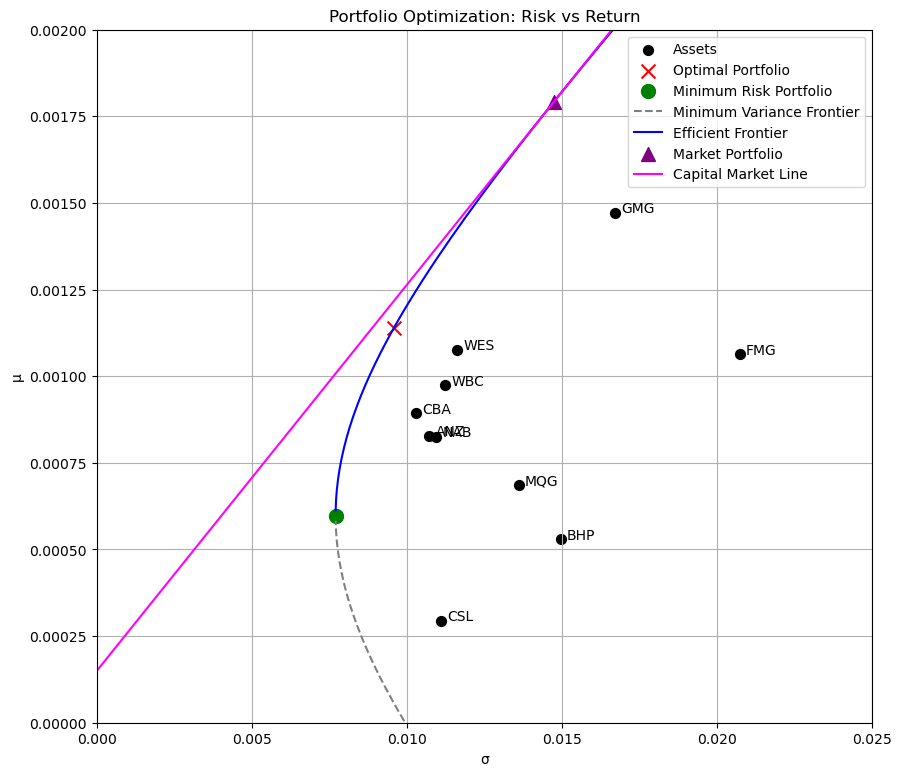

In [10]:
r0 = 0.00015

sigma_0_squared = (a / d) * (r0 - (b / a))**2 + (1 / a)
sigma_0 = np.sqrt(sigma_0_squared)

# Calculate the market portfolio values using the formulas
mu_M = (c - b * r0) / (b - a * r0)
sigma_M = (sigma_0 * np.sqrt(d)) / (b - a * r0)

plt.figure(figsize=(10, 9))

# Plot the 10 assets (Q4 Part i)
asset_risks = np.sqrt(np.diag(C))
plt.scatter(asset_risks, r, label='Assets', color='black', s=50)
for i in range(len(r)):
    plt.text(asset_risks[i]+0.0002, r[i], stocks.columns[i+1])

# Plot the optimal portfolio (Q4 Part ii)
optimal_risk = np.sqrt(x.T @ C @ x)
optimal_return = x.T @ r
plt.scatter(optimal_risk, optimal_return, color='red',
            label='Optimal Portfolio', s=100, marker='x')

# Plot the minimum risk portfolio (Q4 Part iii)
minimum_risk_portfolio = alpha
min_risk_std = np.sqrt(minimum_risk_portfolio.T @ C @ minimum_risk_portfolio)
min_risk_return = minimum_risk_portfolio.T @ r
plt.scatter(min_risk_std, min_risk_return, color='green',
            label='Minimum Risk Portfolio', s=100, marker='o')

# Plot the efficient frontier and minimum frontier (Q4 Part iv)
t_values = np.linspace(-0.5, 0.5, 300)
efficient_frontier = []
minimum_frontier = []

for t in t_values:
    x_t = alpha + t * beta  # Portfolio allocation for a given t
    portfolio_mean = x_t.T @ r  # Mean return
    portfolio_std = np.sqrt(x_t.T @ C @ x_t)  # Standard deviation
    efficient_frontier.append(portfolio_mean)
    minimum_frontier.append(portfolio_std)

efficient_frontier = np.array(efficient_frontier)
minimum_frontier = np.array(minimum_frontier)

# Separate the efficient and inefficient parts of the frontier
efficient_mask = efficient_frontier >= min_risk_return
inefficient_mask = efficient_frontier < min_risk_return

plt.plot(minimum_frontier[inefficient_mask], efficient_frontier[inefficient_mask],
         label='Minimum Variance Frontier', color='grey', linestyle='--')

plt.plot(minimum_frontier[efficient_mask], efficient_frontier[efficient_mask],
         label='Efficient Frontier', color='blue', linestyle='-')

# Plot the risk-free asset (Q5b part ii)
# plt.scatter(0, r0, color='orange', label='Risk-free Asset', s=100, marker='s')
# plt.plot(0, r0, label='Risk-free Asset', color='orange', linestyle='--')

# Plot the market portfolio with the corrected values (Q5b part iii)
plt.scatter(sigma_M, mu_M, color='purple',
            label='Market Portfolio', s=100, marker='^')

# Plot the capital market line (Q5b part iv)
sigma_values = np.linspace(0, 0.025, 100)
CML = r0 + (mu_M - r0) * sigma_values / sigma_M
plt.plot(sigma_values, CML, label='Capital Market Line',
         color='magenta', linestyle='-')

plt.xlabel('σ')
plt.ylabel('μ')
plt.title('Portfolio Optimization: Risk vs Return')
plt.xlim(0, 0.025)
plt.ylim(0, 0.002)
plt.legend()
plt.grid(True)
plt.show()

# Question 6

## Part a

In [11]:
x_M = np.array([0.191, 0.187, 0.116, 0.095, 0.088,
               0.075, 0.072, 0.065, 0.06, 0.051])

r_M = x_M @ r.T

sigma_sq_market = np.dot(x_M.T, np.dot(C, x_M))

def calculate_beta(cov, sigma_sq_market):
    beta = cov / sigma_sq_market
    return beta

cov_with_market = np.array([C[i, :] @ x_M for i in range(len(x_M))])

betas = np.array([calculate_beta(cov, sigma_sq_market)
                 for cov in cov_with_market])

print('Betas for the 10 stocks:')
for i in range(len(betas)):
    print(f'{stocks.columns[i+1]}: {betas[i]:.4f}')

Betas for the 10 stocks:
BHP: 1.1460
CBA: 0.9796
CSL: 0.5694
NAB: 0.9682
WBC: 0.9792
ANZ: 0.9149
MQG: 1.1775
WES: 0.9161
GMG: 1.1743
FMG: 1.3790


# Question 7

## Part a

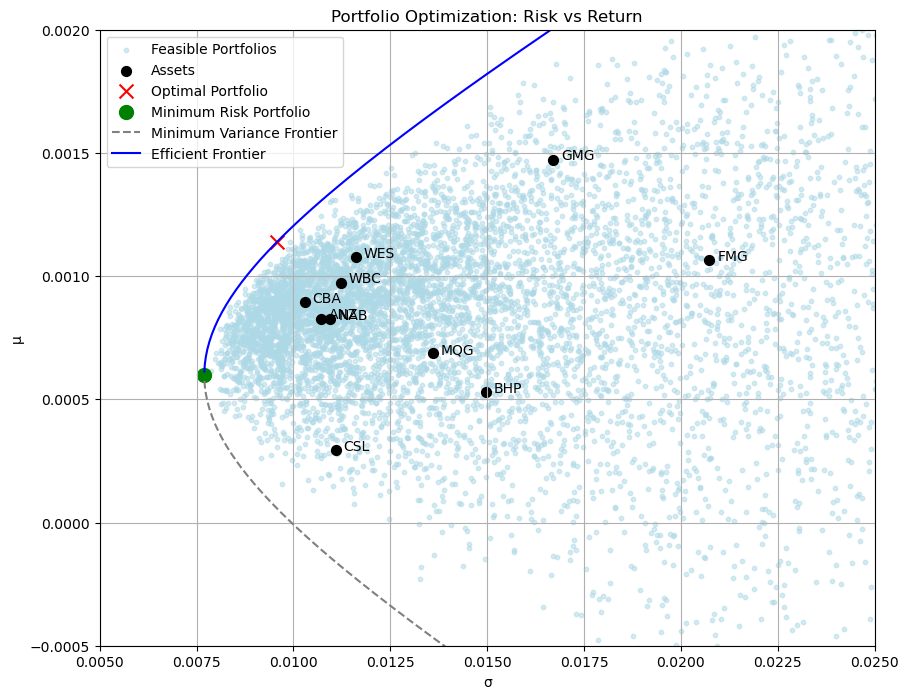

In [35]:
num_portfolios = 10000

portfolio_returns = np.zeros(num_portfolios)
portfolio_risks = np.zeros(num_portfolios)

# Generate random portfolios using normal distribution
for i in range(num_portfolios):
    # Generate weights from a normal distribution
    weights = np.random.normal(0, 1, len(r))
    # Normalize the weights to ensure they sum to 1
    weights /= np.sum(weights)
    portfolio_returns[i] = np.dot(weights, r)
    portfolio_risks[i] = np.sqrt(np.dot(weights.T, np.dot(C, weights)))

plt.figure(figsize=(10, 8))

# From Quesiton 4
plt.scatter(portfolio_risks, portfolio_returns, color='lightblue',
            alpha=0.5, label='Feasible Portfolios', s=10)



asset_risks = np.sqrt(np.diag(C))
plt.scatter(asset_risks, r, label='Assets', color='black', s=50)
for i in range(len(r)):
    plt.text(asset_risks[i] + 0.0002, r[i], stocks.columns[i + 1])

optimal_risk = np.sqrt(x.T @ C @ x)
optimal_return = x.T @ r
plt.scatter(optimal_risk, optimal_return, color='red',
            label='Optimal Portfolio', s=100, marker='x')

minimum_risk_portfolio = alpha
min_risk_std = np.sqrt(minimum_risk_portfolio.T @ C @ minimum_risk_portfolio)
min_risk_return = minimum_risk_portfolio.T @ r
plt.scatter(min_risk_std, min_risk_return, color='green',
            label='Minimum Risk Portfolio', s=100, marker='o')

t_values = np.linspace(-0.5, 0.5, 300)
efficient_frontier = []
minimum_frontier = []

for t in t_values:
    x_t = alpha + t * beta
    portfolio_mean = x_t.T @ r
    portfolio_std = np.sqrt(x_t.T @ C @ x_t)
    efficient_frontier.append(portfolio_mean)
    minimum_frontier.append(portfolio_std)

efficient_frontier = np.array(efficient_frontier)
minimum_frontier = np.array(minimum_frontier)

efficient_mask = efficient_frontier > min_risk_return
inefficient_mask = efficient_frontier < min_risk_return

plt.plot(minimum_frontier[inefficient_mask], efficient_frontier[inefficient_mask],
         label='Minimum Variance Frontier', color='grey', linestyle='--')

plt.plot(minimum_frontier[efficient_mask], efficient_frontier[efficient_mask],
         label='Efficient Frontier', color='blue', linestyle='-')

plt.xlabel('σ')
plt.ylabel('μ')
plt.title('Portfolio Optimization: Risk vs Return')
plt.xlim(0.005, 0.025)
plt.ylim(-0.0005, 0.002)
plt.legend()
plt.grid(True)
plt.show()

## Part b

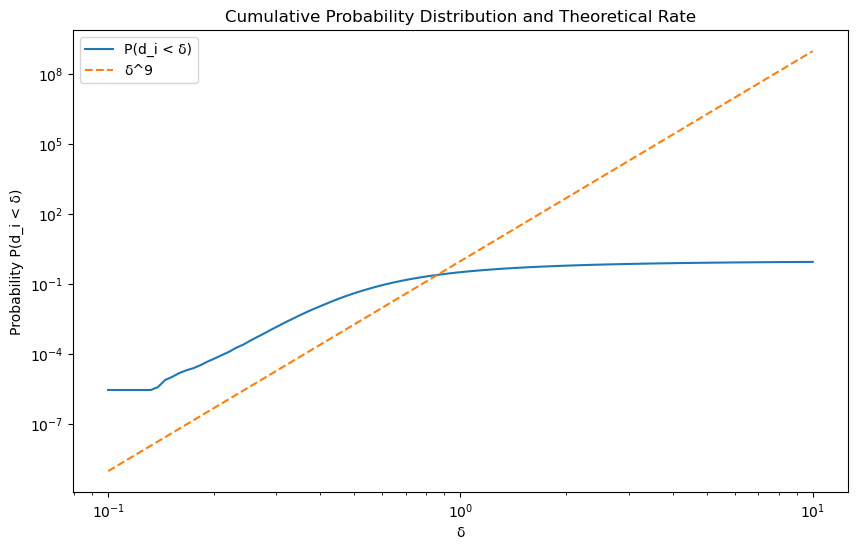

In [38]:
# Number of portfolios to generate
num_portfolios = 1000000

# Placeholder arrays for portfolio returns and risks
portfolio_returns = np.zeros(num_portfolios)
portfolio_risks = np.zeros(num_portfolios)
portfolio_weights = np.zeros((num_portfolios, len(r)))

# Generate random portfolios using normal distribution
for i in range(num_portfolios):
    # Generate weights from a normal distribution
    weights = np.random.normal(0, 1, len(r))
    # Normalize the weights to ensure they sum to 1
    weights /= np.sum(weights)
    portfolio_weights[i] = weights
    portfolio_returns[i] = np.dot(weights, r)
    portfolio_risks[i] = np.sqrt(np.dot(weights.T, np.dot(C, weights)))

# Find the minimum risk portfolio (MVP)
mvp_index = np.argmin(portfolio_risks)
mvp_weights = portfolio_weights[mvp_index]

# Calculate Euclidean distances (d_i) from each portfolio to the MVP
distances = np.linalg.norm(portfolio_weights - mvp_weights, axis=1)

# Define a range for delta
delta_values = np.logspace(-1, 1, 100)  # From 0.1 to 10

# Calculate P(d_i < delta) for each delta
probabilities = [(distances < delta).mean() for delta in delta_values]

# Theoretical rate: delta^9
theoretical_rate = delta_values ** 9

# Plotting the log-log graph
plt.figure(figsize=(10, 6))
plt.loglog(delta_values, probabilities, label='P(d_i < δ)')
plt.loglog(delta_values, theoretical_rate, label='δ^9', linestyle='--')
plt.xlabel('δ')
plt.ylabel('Probability P(d_i < δ)')
plt.title('Cumulative Probability Distribution and Theoretical Rate')
plt.legend()
plt.show()

## Part c

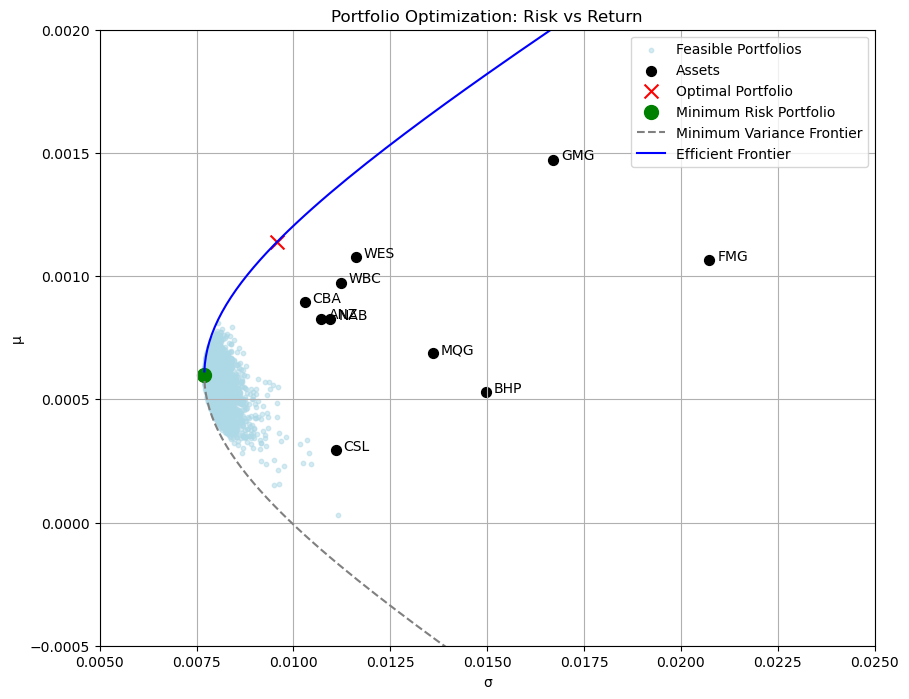

In [40]:
num_portfolios = 10000

portfolio_returns = np.zeros(num_portfolios)
portfolio_risks = np.zeros(num_portfolios)

# Minimum risk portfolio weights
minimum_risk_portfolio = alpha

# Generate random portfolios using a normal distribution centered around the minimum risk portfolio
for i in range(num_portfolios):
    # Generate small random perturbations around the minimum risk portfolio
    # Adjust the standard deviation (0.05) as needed
    perturbation = np.random.normal(0, 0.05, len(r))
    weights = minimum_risk_portfolio + perturbation
    # Normalize the weights to ensure they sum to 1
    weights /= np.sum(weights)
    portfolio_returns[i] = np.dot(weights, r)
    portfolio_risks[i] = np.sqrt(np.dot(weights.T, np.dot(C, weights)))

plt.figure(figsize=(10, 8))

# Plot feasible portfolios
plt.scatter(portfolio_risks, portfolio_returns, color='lightblue',
            alpha=0.5, label='Feasible Portfolios', s=10)

# Plot the individual assets
asset_risks = np.sqrt(np.diag(C))
plt.scatter(asset_risks, r, label='Assets', color='black', s=50)
for i in range(len(r)):
    plt.text(asset_risks[i] + 0.0002, r[i], stocks.columns[i + 1])

# Plot the optimal portfolio
optimal_risk = np.sqrt(x.T @ C @ x)
optimal_return = x.T @ r
plt.scatter(optimal_risk, optimal_return, color='red',
            label='Optimal Portfolio', s=100, marker='x')

# Plot the minimum risk portfolio
min_risk_std = np.sqrt(minimum_risk_portfolio.T @ C @ minimum_risk_portfolio)
min_risk_return = minimum_risk_portfolio.T @ r
plt.scatter(min_risk_std, min_risk_return, color='green',
            label='Minimum Risk Portfolio', s=100, marker='o')

# Plot the efficient frontier and minimum variance frontier
t_values = np.linspace(-0.5, 0.5, 300)
efficient_frontier = []
minimum_frontier = []

for t in t_values:
    x_t = alpha + t * beta
    portfolio_mean = x_t.T @ r
    portfolio_std = np.sqrt(x_t.T @ C @ x_t)
    efficient_frontier.append(portfolio_mean)
    minimum_frontier.append(portfolio_std)

efficient_frontier = np.array(efficient_frontier)
minimum_frontier = np.array(minimum_frontier)

efficient_mask = efficient_frontier > min_risk_return
inefficient_mask = efficient_frontier < min_risk_return

plt.plot(minimum_frontier[inefficient_mask], efficient_frontier[inefficient_mask],
         label='Minimum Variance Frontier', color='grey', linestyle='--')

plt.plot(minimum_frontier[efficient_mask], efficient_frontier[efficient_mask],
         label='Efficient Frontier', color='blue', linestyle='-')

plt.xlabel('σ')
plt.ylabel('μ')
plt.title('Portfolio Optimization: Risk vs Return')
plt.xlim(0.005, 0.025)
plt.ylim(-0.0005, 0.002)
plt.legend()
plt.grid(True)
plt.show()